In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastseq.all import *
from fastai2.basics import *
from fastseq.models.nbeats import *
from fastseq.data.external import *

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataBunch.from_folder(path, horizon = 14,nrows = 30,step=3)

Train:7562; Valid: 90; Test 30


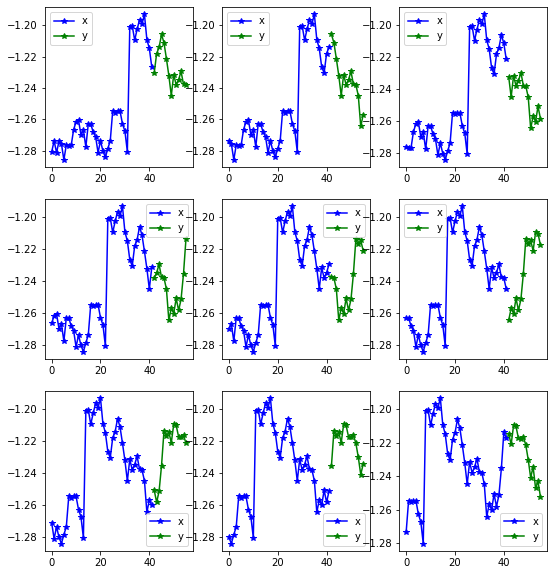

In [ ]:
# items = dummy_data_generator(50, 10, nrows=1000)
# data = TSDataBunch.from_items(items, horizon = 7)
data.show_batch()

In [ ]:
# TODO make custom learner with custom model
learn = nbeats_learner(data, stack_types=("trend","seasonality"), b_loss=.4,theta=.1,
                       loss_func= CombinedLoss(F.mse_loss, smape, ratio = {'smape':.5})
                      )

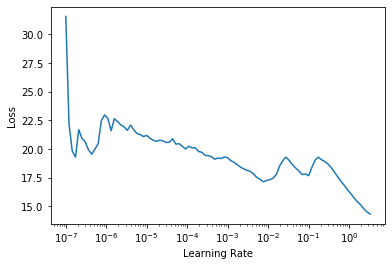

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,mse_loss,theta,b_loss,time
0,8.769581,2.665152,1.109640,1.485948,1.706355,0.231902,0.481583,00:07
1,2.204493,2.640507,1.135920,1.493102,1.784163,0.223942,0.218499,00:07
2,1.578775,2.565901,1.107417,1.602403,1.686279,0.190047,0.148539,00:07
3,1.616956,1.844594,0.859330,1.249006,1.116892,0.255576,0.194102,00:07
4,1.720548,2.371931,1.026561,1.320107,1.577911,0.371991,0.241916,00:07
5,1.523103,2.492481,1.098498,1.548597,1.634231,0.256341,0.145793,00:07
6,1.496868,2.787451,1.199421,1.651323,1.872914,0.285765,0.150747,00:07
7,1.504463,2.821855,1.213062,1.612520,1.922971,0.296105,0.157534,00:07
8,1.491682,2.825236,1.214614,1.599382,1.932213,0.300085,0.158311,00:07
9,1.481449,2.816589,1.212137,1.595901,1.925681,0.297508,0.158015,00:07


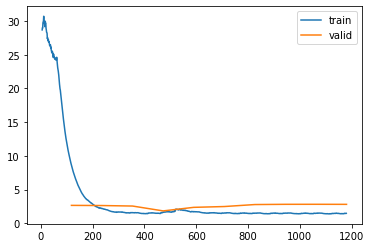

In [ ]:
learn.fit_one_cycle(10, 2e-2)
learn.recorder.plot_loss()

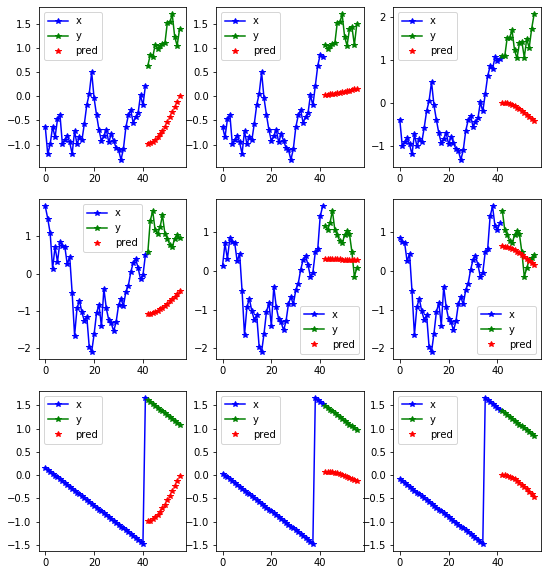

In [ ]:
learn.show_results(1,max_n=9)

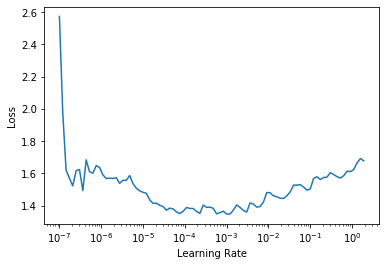

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,mse_loss,theta,b_loss,time
0,1.479835,2.816770,1.212191,1.596046,1.925774,0.297521,0.158050,00:07
1,1.479874,2.817184,1.212321,1.596382,1.925980,0.297538,0.158147,00:07
2,1.479844,2.817452,1.212400,1.596638,1.926069,0.297570,0.158266,00:07
3,1.479727,2.817573,1.212431,1.596824,1.926049,0.297608,0.158379,00:07
4,1.479581,2.817603,1.212433,1.596944,1.925980,0.297639,0.158468,00:07
5,1.479431,2.817580,1.212419,1.597016,1.925891,0.297668,0.158532,00:07
6,1.479306,2.817513,1.212391,1.597041,1.925792,0.297695,0.158578,00:07
7,1.479228,2.817492,1.212386,1.597043,1.925761,0.297694,0.158600,00:07
8,1.479183,2.817474,1.212380,1.597038,1.925742,0.297692,0.158608,00:07
9,1.479167,2.817468,1.212379,1.597036,1.925737,0.297690,0.158609,00:07


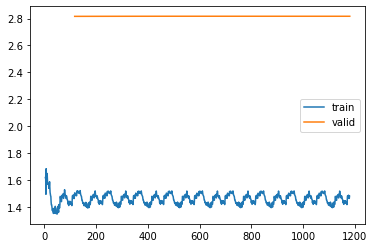

In [ ]:
learn.fit_one_cycle(10, 2e-5)
learn.recorder.plot_loss()

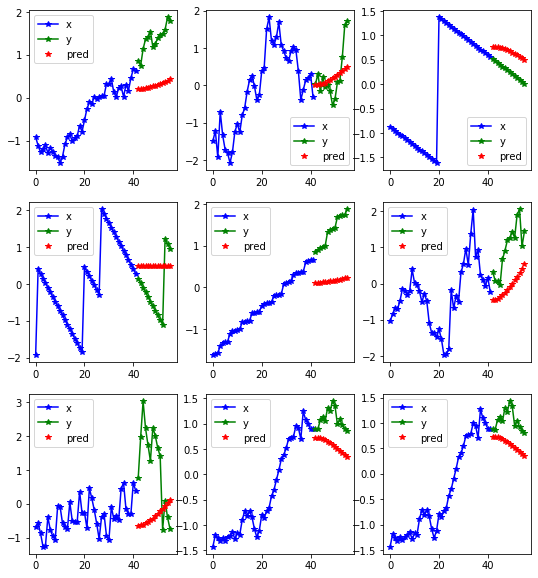

In [ ]:
learn.show_results(2,max_n=9)

## Interperation

In [ ]:
from fastai2.interpret import *
from fastseq.interpret import *

In [ ]:
interp = NBeatsInterpretation.from_learner(learn)

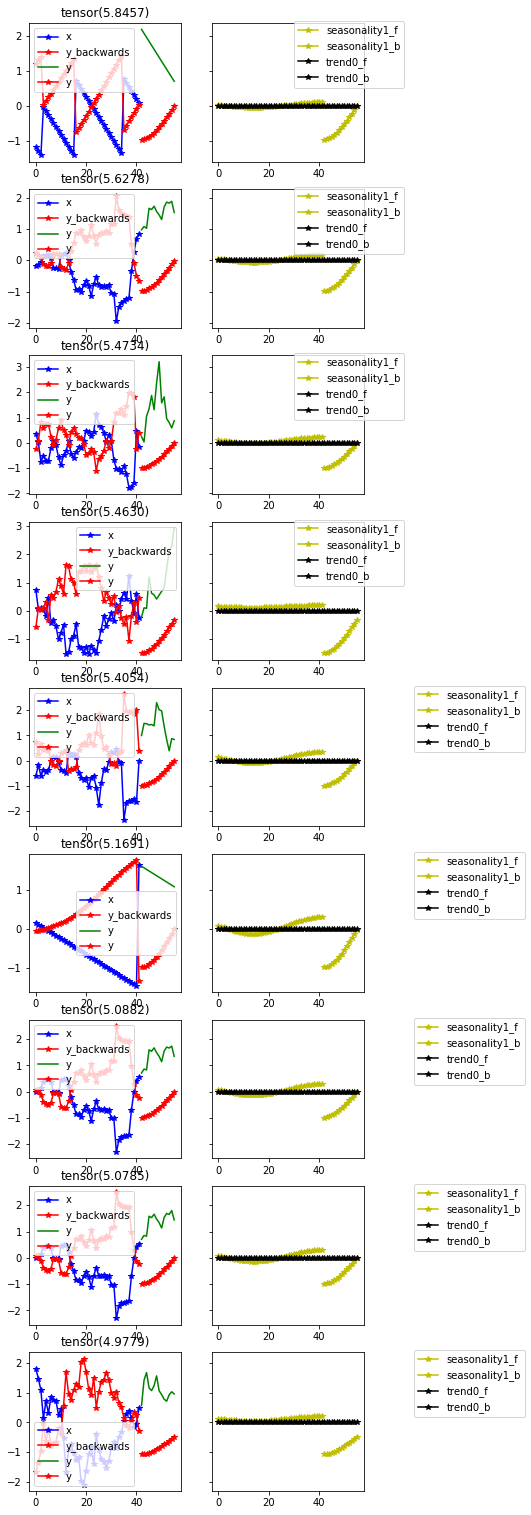

In [ ]:
interp.plot_top_losses(9)